
<h2 style="color: white; text-align: left; padding: 15px; border-radius: 5px;">
    Import Necessary Libraries
</h2>
<ul style=" color: white; text-align: left; padding: 15px; border-radius: 5px; list-style-type: arrow;">
    <li>Pandas</li>
    <li>NumPy</li>
    <li>Matplotlib</li>
    <li>Seaborn</li>
    <li>Warnings</li>
</ul>


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Set a consistent style

sns.set(style="whitegrid")


##    Import Dataset


In [2]:
data = pd.read_csv(r"C:\Users\Latitude\.cache\kagglehub\datasets\swatikhedekar\price-prediction-of-diamond\versions\3\diamonds.csv")
df = pd.DataFrame(data)


## Read DataSet

In [3]:
df.head(2)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31



<h1 style=" text-align: center; padding: 15px; border-radius: 5px;">
    Diamond Dataset Column Explanations
</h1>

| Column  | Meaning |
|---------|---------|
| `carat` | Weight of the diamond (higher carat = bigger diamond). |
| `cut`   | Quality of the cut (e.g., Ideal, Premium, Good). Better cuts reflect more light. |
| `color` | Diamond color grade (D is the best, J is the lowest). |
| `clarity` | Purity of the diamond (e.g., SI1, VS1, VS2). Fewer inclusions = better clarity. |
| `depth` | Height of the diamond as a percentage of its width. |
| `table` | Width of the top flat surface of the diamond as a percentage. |
| `price` | Price of the diamond in dollars. |
| `x` | Length of the diamond in millimeters. |
| `y` | Width of the diamond in millimeters. |
| `z` | Depth (height) of the diamond in millimeters. |


## Remove Unnecessary columns

In [4]:
df.drop('Unnamed: 0', axis = 1, inplace= True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## information about the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


## statistical insights

In [6]:
df.describe() # Numeric

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
df.describe(include = 'O') # Non-Numeric

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


## Check Null values 

In [8]:
df.isna().sum() / df.shape[0] * 100

carat      0.0
cut        0.0
color      0.0
clarity    0.0
depth      0.0
table      0.0
price      0.0
x          0.0
y          0.0
z          0.0
dtype: float64

##### we have 0% null value on our dataset

## Check any duplicates 

In [9]:
df[df.duplicated()]

,carat,cut,color,clarity,depth,table,price,x,y,z
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
47969,0.52,Ideal,D,VS2,61.8,55.0,1919,5.19,5.16,3.20
49326,0.51,Ideal,F,VVS2,61.2,56.0,2093,5.17,5.19,3.17
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17


### we find 146 duplicated rows in our dataset

In [10]:
df = df.drop_duplicates().reset_index(drop=True) # Duplicates removed
df.shape

(53794, 10)

## remove rows which contain 0 values 

In [11]:
(df == 0).sum()

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           7
y           6
z          19
dtype: int64

In [12]:
df = df[(df[['x', 'y', 'z']] != 0).all(axis=1)]
df.shape

(53775, 10)

### Number of rows: 53775
### Number of Columns: 10

In [13]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [14]:
carat_price_agg = df.groupby('carat')['price'].agg(['min', 'max', 'sum', 'mean'])
carat_price_agg.head()

,min,max,sum,mean
carat,,,,
0.20,345,367,4382,365.166667
0.21,326,394,3422,380.222222
0.22,337,470,1957,391.400000
0.23,326,688,142440,486.143345
0.24,336,963,128317,505.185039


### Number of unique carat in dataset: 273

## Scatter plot of carat vs.  price

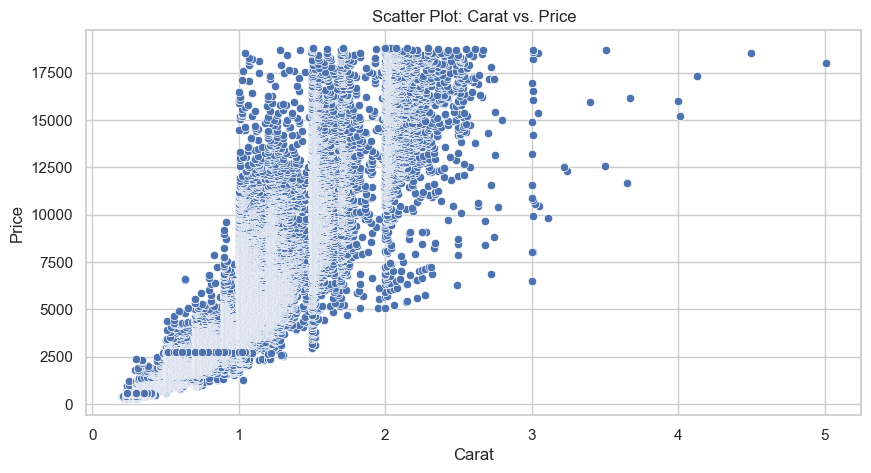

In [15]:
# Scatter plot of carat vs.  price
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='carat', y='price')
plt.title("Scatter Plot: Carat vs. Price")
plt.xlabel("Carat")
plt.ylabel("Price")
plt.show()

<p>
    
1. **Positive Correlation** :  
   - As the **carat** increases, the **price** generally increases, meaning heavier diamonds tend to be more expensive.

2. **Price Variation for Similar Carats**:  
   - For a given **carat value**, the price varies widely. This suggests that other factors (like cut quality, clarity, and color) influence price beyond just carat.

4. **Clustering at Lower Carats**:  
   - Most diamonds have a **carat weight below 2**, with a dense concentration in the **0.5 - 1.5 carat** range.

5. **Outliers at Higher Carats**:  
   - A few diamonds above **3 carats** have significantly higher prices, which could indicate rare, high-quality stones.

    
</p>

## Impact of cut, color, and clarity on price:

In [16]:
df[['cut','color','clarity']].nunique()

cut        5
color      7
clarity    8
dtype: int64

In [17]:
def annotate_bars(ax):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height()):,}',  
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

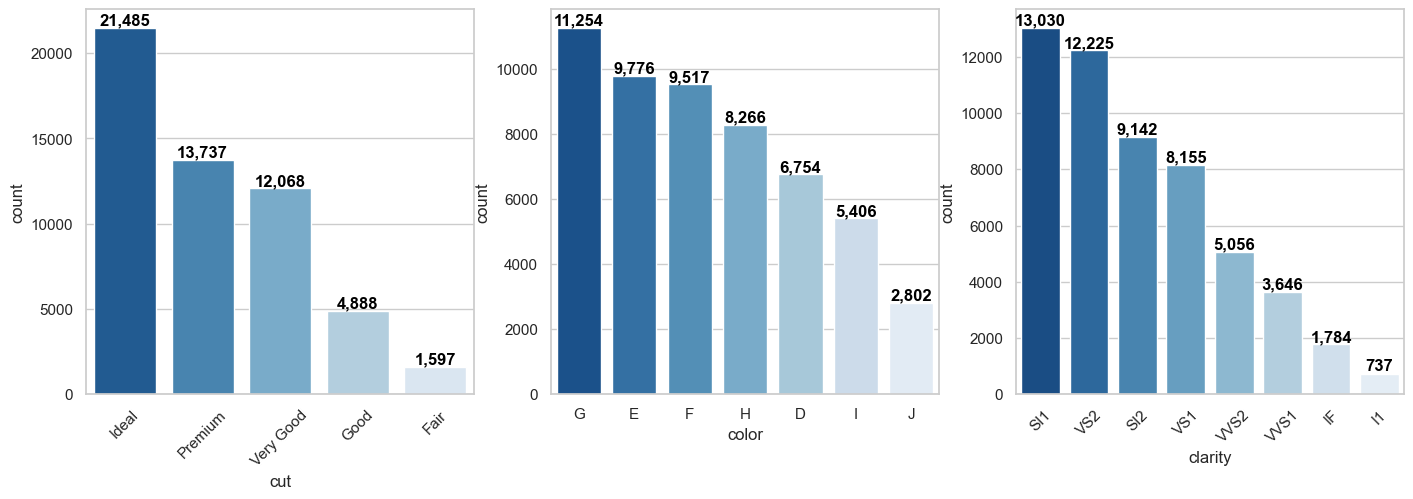

In [18]:

cut_count = df['cut'].value_counts().reset_index()
cut_count.columns = ['cut', 'count' ]

color_count = df['color'].value_counts().reset_index()
color_count.columns = ['color', 'count' ]

clarity_count = df['clarity'].value_counts().reset_index()
clarity_count.columns = ['clarity', 'count' ]

# Plot the count of each cut category
plt.figure(figsize=(17, 5))

plt.subplot(1,3,1)
ax = sns.barplot(x='cut', y='count', data=cut_count, palette="Blues_r")
annotate_bars(ax)
plt.xticks(rotation=45)


plt.subplot(1,3,2)
ax = sns.barplot(x='color', y='count', data=color_count, palette="Blues_r")
annotate_bars(ax)


plt.subplot(1,3,3)
ax = sns.barplot(x='clarity', y='count', data=clarity_count, palette="Blues_r")
annotate_bars(ax)



plt.xticks(rotation=45)

plt.show()

## price of diamonds based on different categorical features:

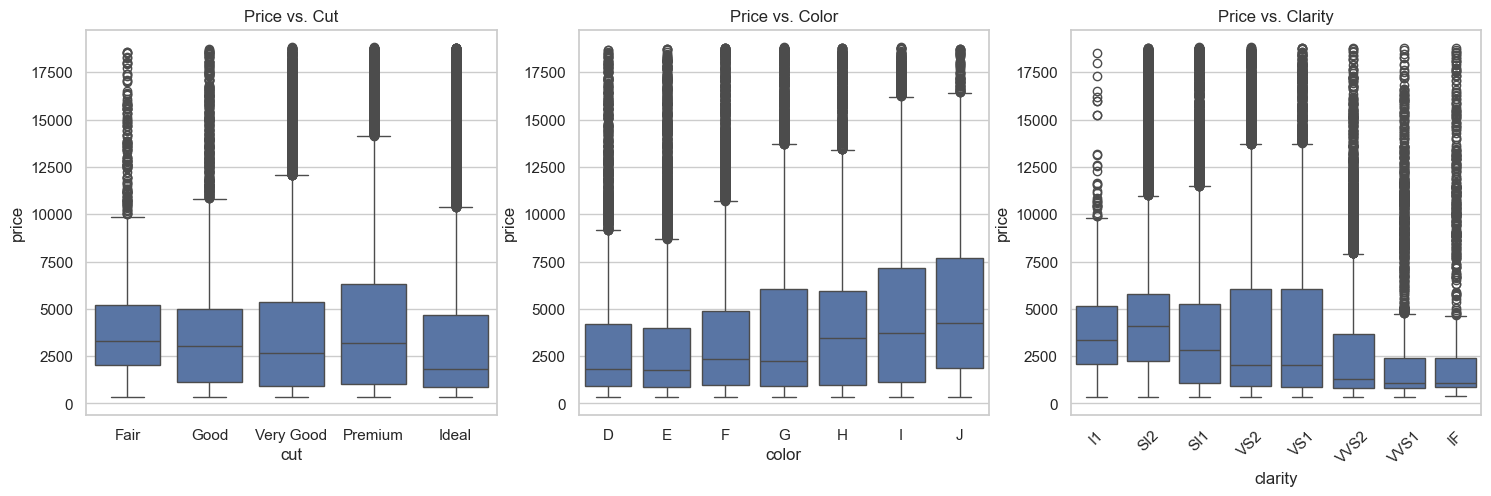

In [19]:

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(x="cut", y="price", data=df, ax=axes[0], order=["Fair", "Good", "Very Good", "Premium", "Ideal"])

axes[0].set_title("Price vs. Cut")

sns.boxplot(x="color", y="price", data=df, ax=axes[1], order=sorted(df["color"].unique()))
axes[1].set_title("Price vs. Color")

sns.boxplot(x="clarity", y="price", data=df, ax=axes[2], order=["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"])
axes[2].set_title("Price vs. Clarity")

plt.xticks(rotation=45)
plt.show()


 1. **Left Plot: "Price vs. Cut"**   
   - The median price (middle line in the boxes) appears similar across all cuts.  
   - There are **many outliers** (dots above the whiskers), especially for **higher prices**.  
   - The spread of prices increases from **Fair → Premium → Ideal**.

2. **Middle Plot: "Price vs. Color"**  
   - Higher color grades (closer to D) tend to have **lower median prices**, while **J-colored diamonds** have the highest median price.  
   - The price spread increases as color grade worsens (D → J).  
   - Again, **many outliers** are present.

3. **Right Plot: "Price vs. Clarity"**  
  
   - Lower clarity (I1, SI2) has **higher median prices** compared to higher clarity (IF, VVS1).  
   - However, the **highest clarity diamonds (IF, VVS1, VVS2)** have **wider price ranges**.  

### **Key Takeaways**:  
**Higher-quality diamonds (Ideal cut, D color, and IF clarity) don’t always have the highest median price**, but they do have significant price variability.  
**Many high-priced outliers** exist in all categories, meaning some diamonds are exceptionally expensive regardless of cut, color, or clarity.  
**Price distribution is skewed**, with most diamonds clustering in lower price ranges, but a few extremely high-priced ones drive up the range.  

## This bar plot visualizes the average price of diamonds based on color and further grouped by cut category

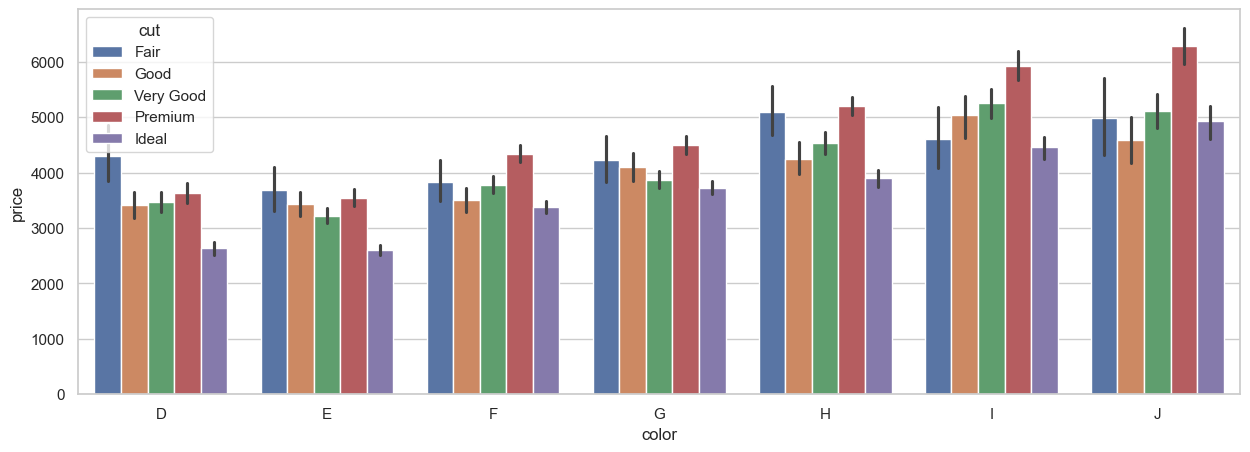

In [20]:
plt.figure(figsize=(15,5))
sns.barplot(data = df, x = 'color', y = 'price', hue = 'cut', order = sorted(df['color'].unique()),hue_order=["Fair", "Good", "Very Good", "Premium", "Ideal"]);

### **Key Observations:**
**Fair-cut diamonds (dark blue bars) tend to have the highest prices** in almost every color category. This suggests that **Fair-cut diamonds might be larger in carat size**, since cut quality alone would not justify a higher price.  

**Ideal-cut diamonds (purple bars) have the lowest prices** across all color grades, likely because they tend to be smaller in size but optimized for brilliance.  

**As the color worsens (D → J), the price generally increases.**  
   - This contradicts the usual assumption that **colorless diamonds (D) are the most expensive.**  
   - It suggests that diamonds in the **I and J range might be larger in size, outweighing the effect of color on price.**  

**Premium-cut diamonds (red bars) show higher prices in color grades G to J.**  
   - This indicates that diamonds with a "Premium" cut may be in high demand even if they are slightly more tinted.  



### 3. Carat vs. Dimensions (x, y, z) Scatter Plots ###

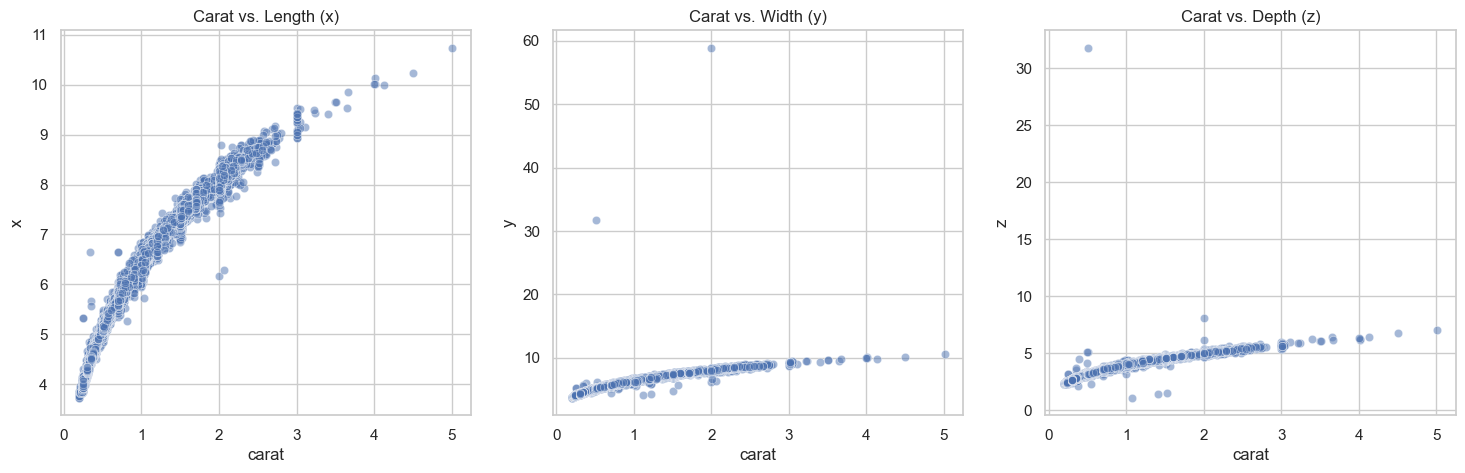

In [21]:

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(x=df["carat"], y=df["x"], alpha=0.5, ax=axes[0])
axes[0].set_title("Carat vs. Length (x)")

sns.scatterplot(x=df["carat"], y=df["y"], alpha=0.5, ax=axes[1])
axes[1].set_title("Carat vs. Width (y)")

sns.scatterplot(x=df["carat"], y=df["z"], alpha=0.5, ax=axes[2])
axes[2].set_title("Carat vs. Depth (z)")

plt.show()


 ### **Plot 1 (Left): "Carat vs. Length (x)"**  
- **Strong positive correlation**: As carat increases, the diamond's length **(x-dimension)** increases non-linearly.  
- The growth rate appears to slow as carat increases, possibly due to **proportional constraints** on diamond shape.  

### **Plot 2 (Middle): "Carat vs. Width (y)"**  
- **Mostly linear relationship**, but with a few extreme outliers where (y) is unexpectedly large (~50-60).  
- These **outliers may be errors** 
- Most data points **cluster closely** in a steady increase.  

### **Plot 3 (Right): "Carat vs. Depth (z)"**  
- Similar to the width plot, **depth (z-dimension) increases gradually** as carat increases.  
- **Outliers** exist where (z) is abnormally large (~30+), suggesting potential data anomalies.  
- Depth varies **much less than length and width**, which makes sense because diamonds tend to have more constrained depth due to their cutting style.  

---

### **Key Takeaways:**  
**Strong correlation between carat and diamond size**—larger carat diamonds are physically bigger in all dimensions.  
**Some outliers in width and depth** suggest possible data entry errors or unusual diamond proportions.  
**Length (x) increases most significantly**, while **width (y) and depth (z) grow more slowly** in comparison.  

## 4. Depth vs. Price Scatter Plot 
### relationship between **Depth %** and **Price**:

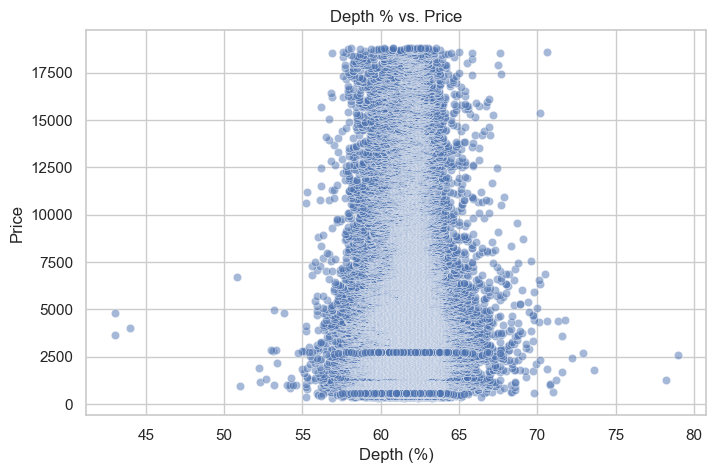

In [22]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["depth"], y=df["price"], alpha=0.5)
plt.title("Depth % vs. Price")
plt.xlabel("Depth (%)")
plt.ylabel("Price")
plt.show()


1. **Concentration of Data**: Most data points are clustered between 55% and 65% depth. This range seems to be popular or optimal, possibly indicating that diamonds within this depth range are in higher demand or offer better proportions, impacting their pricing.

2. **Price Range**: Prices span widely, from very low to as high as 17,500. While the lower prices seem spread across various depths, higher prices are more concentrated around certain depth percentages, possibly signifying better quality or more premium diamonds.

3. **Outliers**: Some points stand apart from the cluster, particularly in higher price ranges. These could represent exceptionally rare or high-quality diamonds, or anomalies in the data.

4. **Correlation**: There doesn’t appear to be a strong linear correlation between depth and price, as prices vary significantly across depths. However, certain depth ranges might slightly influence pricing patterns due to their desirability.

### 5. Heatmap of Feature Correlations ###

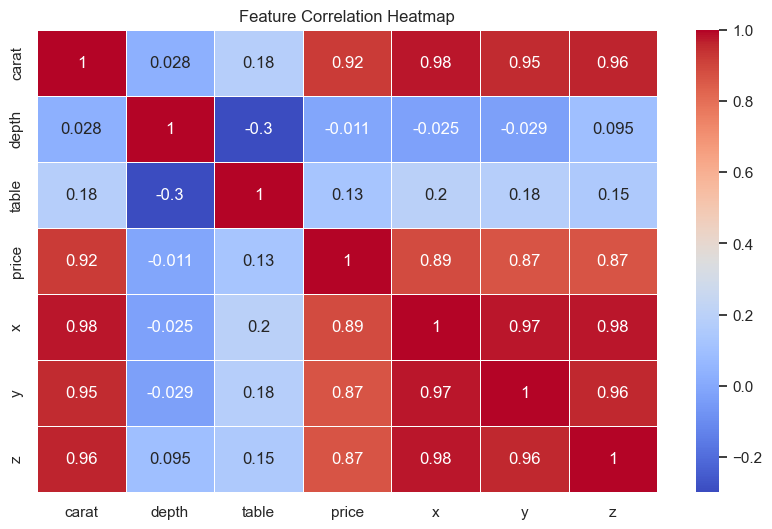

In [23]:


plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()



1. **Strong Positive Correlations**:
   - **Carat and Price**: A correlation of **0.92** indicates that as the carat size of diamonds increases, their price generally rises. This is an expected result, as larger diamonds are typically more valuable.
   - **Carat and Dimensions (X, Y, Z)**: With correlations above **0.95**, the carat size is strongly tied to the physical dimensions of the diamond. This makes sense, as carat represents the weight, which directly relates to size.
   - **Price and Dimensions (X, Y, Z)**: Prices are highly correlated with dimensions, with values around **0.87–0.89**. Larger dimensions often indicate bigger diamonds, leading to higher prices.

2. **Weak or Negative Correlations**:
   - **Depth and Price**: A very weak negative correlation (**-0.011**) suggests depth doesn’t strongly influence the price directly. Diamonds with optimal depth might still fetch better prices indirectly due to aesthetic appeal.
   - **Depth and Table**: A negative correlation (**-0.3**) shows that as depth increases, table size decreases. This could reflect trade-offs in diamond proportions.

3. **Table and Price**:
   - A mild positive correlation (**0.13**) suggests that table size impacts price to some extent, likely due to how it influences light reflection.

### Observations:
The data indicates that **carat size** and **dimensions** are the most influential features for determining diamond price. Depth and table have a less direct impact, potentially influencing price through aesthetic or performance factors.

# **Thank you**